# Setup

In [48]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns

# Reading Dataset

In [49]:
df = pd.read_csv('../data/Pulled/Estimated_Number_of_Individuals_with_Drug_Use_Disorder_Year_2016_-_Current_Quarterly_County___Statewide_Health.csv')
df.head()

,Geographic Area,Geographic Name,Gender,Age,Year,Time Period,Drug Use Disorder Estimate,Drug Use Disorder Estimate Description,Drug Use Disorder Estimate Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
0,State,Commonwealth,All,25 to 34 years,2016,2016 Annual,88562.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
1,State,Commonwealth,All,0 to 14 years,2018,2018 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
2,State,Commonwealth,All,0 to 14 years,2019,2019 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
3,County,Union,All,All (12 to 100 years),2016,2016 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,60,60,42,119,40.964731,-77.064158,POINT (-77.06415803 40.96473131)
4,County,Northampton,All,All (12 to 100 years),2020,2020 Annual,6159.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,48,48,42,95,40.754595,-75.312637,POINT (-75.31263726 40.754595404)


In [50]:
df[df['Age'] == 'All (12 to 100 years)']

,Geographic Area,Geographic Name,Gender,Age,Year,Time Period,Drug Use Disorder Estimate,Drug Use Disorder Estimate Description,Drug Use Disorder Estimate Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
3,County,Union,All,All (12 to 100 years),2016,2016 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,60,60,42,119,40.964731,-77.064158,POINT (-77.06415803 40.96473131)
4,County,Northampton,All,All (12 to 100 years),2020,2020 Annual,6159.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,48,48,42,95,40.754595,-75.312637,POINT (-75.31263726 40.754595404)
5,County,Pike,All,All (12 to 100 years),2017,2017 Annual,1212.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,52,52,42,103,41.332572,-75.032709,POINT (-75.03270924 41.332571995)
6,County,Chester,All,All (12 to 100 years),2017,2017 Annual,9363.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,15,15,42,29,39.974871,-75.756265,POINT (-75.75626498 39.974870557)
7,County,Greene,All,All (12 to 100 years),2020,2020 Annual,748.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,30,30,42,59,39.854804,-80.229438,POINT (-80.22943817 39.854803934)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,County,Pike,All,All (12 to 100 years),2018,2018 Annual,1524.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,52,52,42,103,41.332572,-75.032709,POINT (-75.03270924 41.332571995)
381,County,Tioga,All,All (12 to 100 years),2018,2018 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,59,59,42,117,41.773338,-77.257881,POINT (-77.25788076 41.773338336)
382,County,Montour,All,All (12 to 100 years),2020,2020 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,47,47,42,93,41.028018,-76.664705,POINT (-76.66470527 41.028018244)
383,State,Commonwealth,Female,All (12 to 100 years),2019,2019 Annual,95148.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)


# Plots

In [51]:
## Removing PA to not count Twice Will have to make a new dataframe as gender is only by state
df1 = df[df['Geographic Area'] != 'County']
df1 = df1[df1['Age'] != 'All (12 to 100 years)']

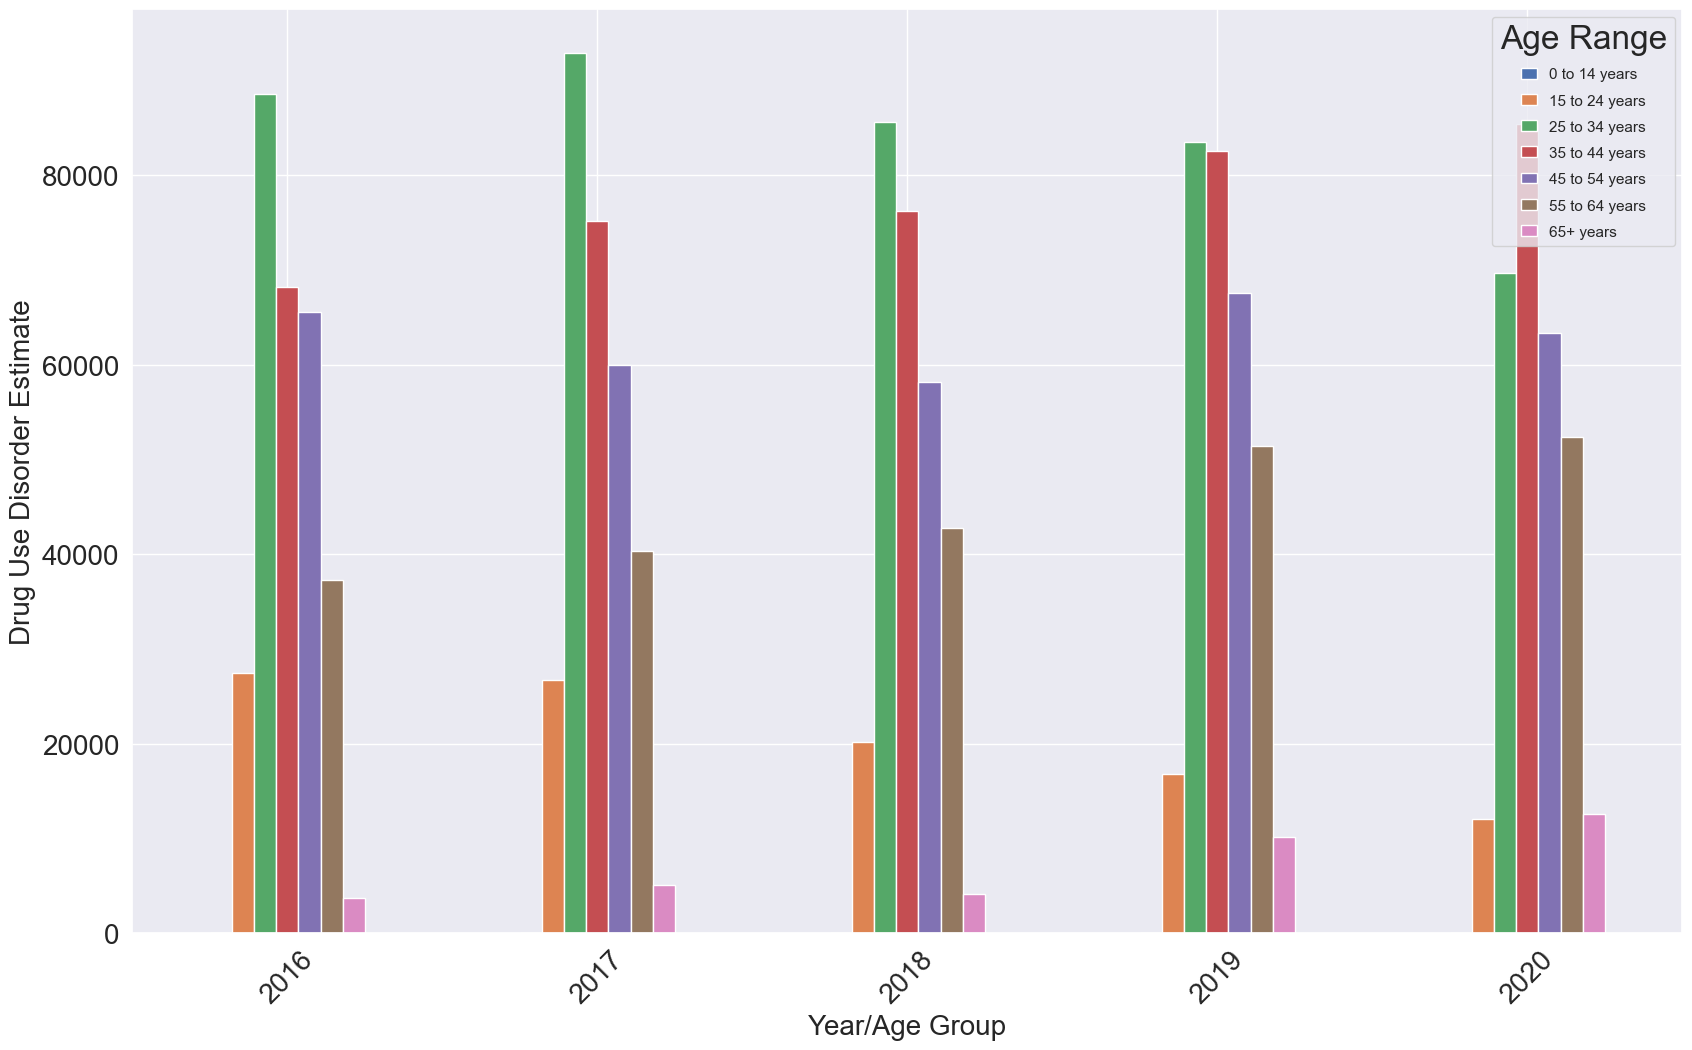

In [52]:
plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
df1.groupby(['Year', 'Age'])['Drug Use Disorder Estimate'].mean().unstack().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Year/Age Group', fontsize=20)
plt.ylabel(ylabel = 'Drug Use Disorder Estimate', fontsize=20)
plt.legend(borderpad=.5, labelspacing=.8,handlelength=1,fontsize = 11, title = 'Age Range')
plt.show()

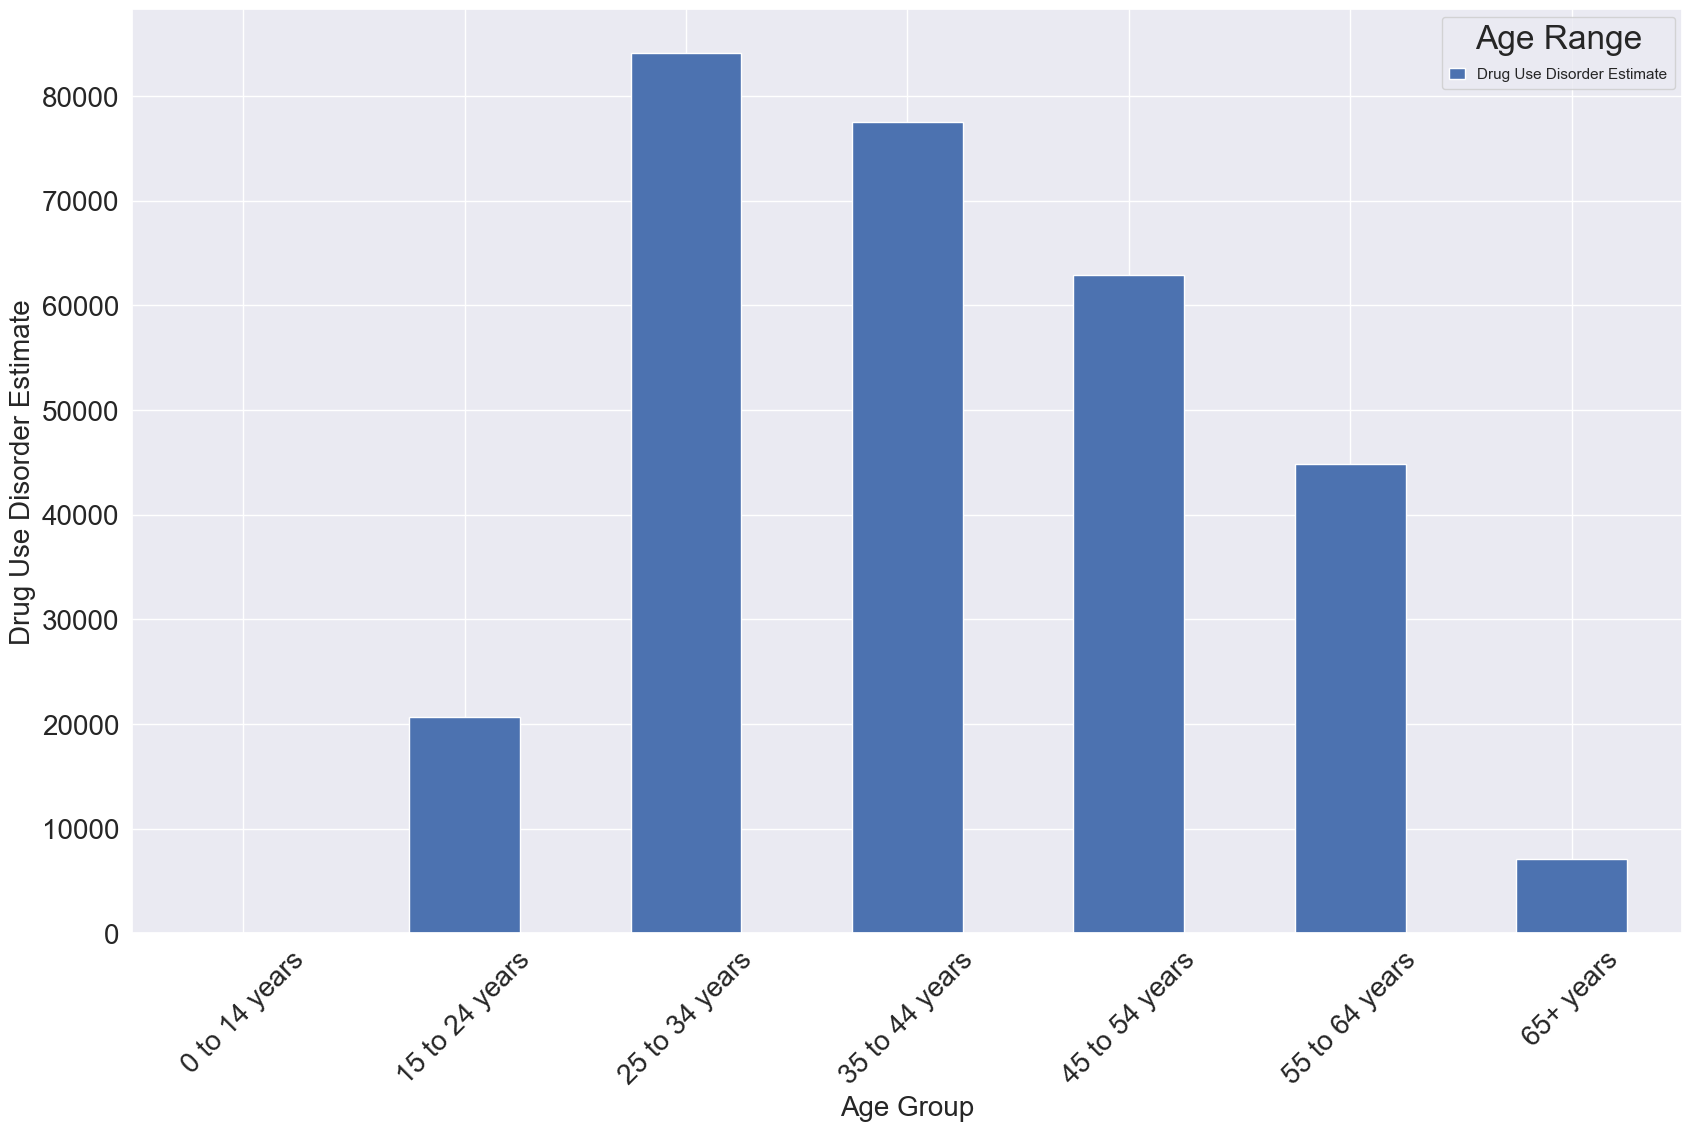

In [53]:
plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
df1.groupby(['Age'])['Drug Use Disorder Estimate'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Age Group', fontsize=20)
plt.ylabel(ylabel = 'Drug Use Disorder Estimate', fontsize=20)
plt.legend(borderpad=.5, labelspacing=.8,handlelength=1,fontsize = 11, title = 'Age Range')
plt.show()

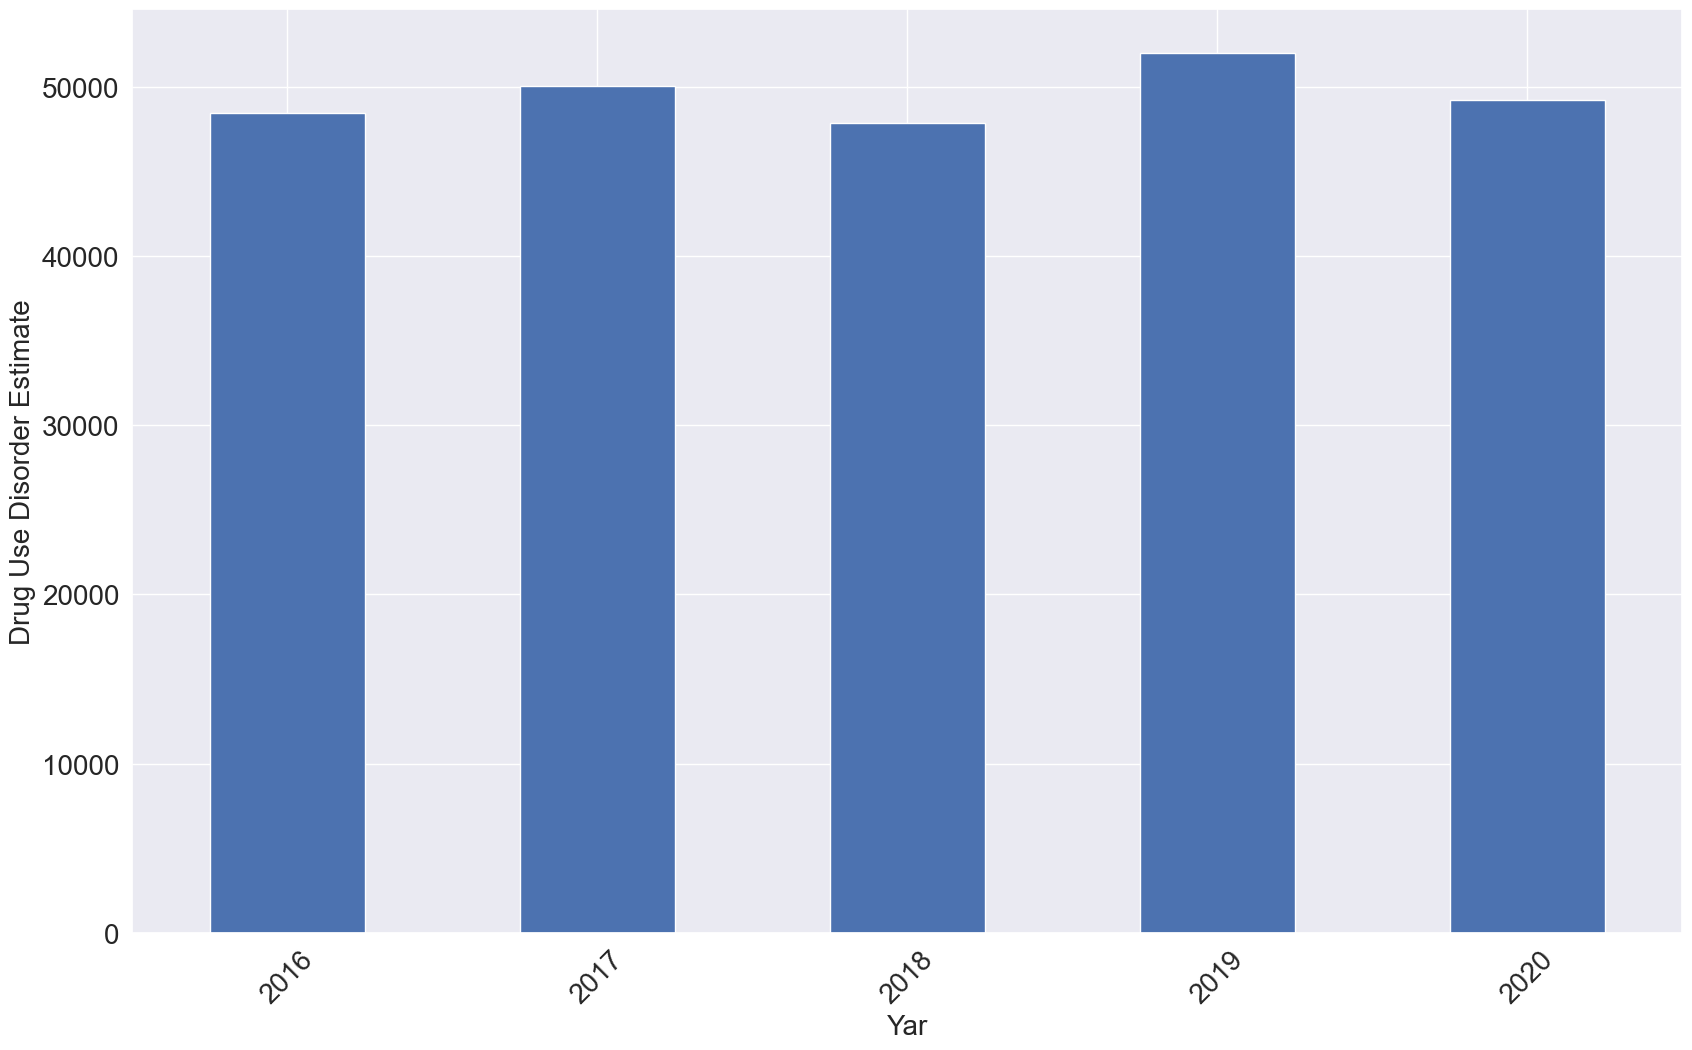

In [54]:
plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
df1.groupby(['Year'])['Drug Use Disorder Estimate'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Yar', fontsize=20)
plt.ylabel(ylabel = 'Drug Use Disorder Estimate', fontsize=20)
plt.show()

In [55]:
### not a lot of change I expected 2020 to be highetr
### Age range does not allign with the other datasets,
##The other datasets have an older population

In [56]:
df

,Geographic Area,Geographic Name,Gender,Age,Year,Time Period,Drug Use Disorder Estimate,Drug Use Disorder Estimate Description,Drug Use Disorder Estimate Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
0,State,Commonwealth,All,25 to 34 years,2016,2016 Annual,88562.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
1,State,Commonwealth,All,0 to 14 years,2018,2018 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
2,State,Commonwealth,All,0 to 14 years,2019,2019 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
3,County,Union,All,All (12 to 100 years),2016,2016 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,60,60,42,119,40.964731,-77.064158,POINT (-77.06415803 40.96473131)
4,County,Northampton,All,All (12 to 100 years),2020,2020 Annual,6159.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,48,48,42,95,40.754595,-75.312637,POINT (-75.31263726 40.754595404)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,County,Pike,All,All (12 to 100 years),2018,2018 Annual,1524.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,52,52,42,103,41.332572,-75.032709,POINT (-75.03270924 41.332571995)
381,County,Tioga,All,All (12 to 100 years),2018,2018 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,59,59,42,117,41.773338,-77.257881,POINT (-77.25788076 41.773338336)
382,County,Montour,All,All (12 to 100 years),2020,2020 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,47,47,42,93,41.028018,-76.664705,POINT (-76.66470527 41.028018244)
383,State,Commonwealth,Female,All (12 to 100 years),2019,2019 Annual,95148.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)


In [57]:
county_mask = df['Geographic Area'] == 'County'
all_age_mask = df['Age'] == 'All (12 to 100 years)'


In [58]:
df_county = df[county_mask & all_age_mask]

In [59]:
keep_columns = ['Geographic Name', 'Year', 'Drug Use Disorder Estimate']

In [60]:
df_county_subset = df_county[keep_columns]

In [61]:
df_county_subset[df_county_subset['Drug Use Disorder Estimate'].isna()]

,Geographic Name,Year,Drug Use Disorder Estimate
3,Union,2016,NaN
8,Clarion,2020,NaN
14,Fulton,2017,NaN
18,Juniata,2017,NaN
20,Warren,2020,NaN
...,...,...,...
365,Tioga,2016,NaN
366,Potter,2016,NaN
372,Centre,2019,NaN
381,Tioga,2018,NaN


In [65]:
na_mask = df_county_subset['Drug Use Disorder Estimate'].isna()

In [80]:
df_county_subset.loc[na_mask, ['Drug Use Disorder Estimate']] = 0

C:\Users\silas\Anaconda3\envs\DSCI591\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [81]:
df_county_subset

,Geographic Name,Year,Drug Use Disorder Estimate
3,Union,2016,0.0
4,Northampton,2020,6159.0
5,Pike,2017,1212.0
6,Chester,2017,9363.0
7,Greene,2020,748.0
...,...,...,...
377,Lawrence,2020,2542.0
380,Pike,2018,1524.0
381,Tioga,2018,0.0
382,Montour,2020,0.0
